# EFFECTIVE GROWTH

1. Here we analyse the effective growth function for the midpoint and the unequal-time power spectrum, to understand why they are equal at some scale. 

2. We also plot the power spectra as a function of redshift at a fixed k to understand when the unequal-time correlations stop being important.

In [1]:
import numpy as np
import pandas
from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM
from skypy.power_spectrum import growth_function

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'legend.frameon': False,
    'legend.handlelength': 1.5,
})

## 1. Power spectra

In [3]:
import sys
sys.path.append("../unequalpy")
from matter import matter_power_spectrum_1loop as Petc
from matter import matter_unequal_time_power_spectrum as Puetc
from approximation import geometric_approx as Pgeom
from approximation import midpoint_approx as Pmid

* Cosmology and normilised growth

In [4]:
cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)

In [5]:
def Dz(redshift):
    return growth_function(redshift, cosmo)/growth_function(0, cosmo)

* Load FAST-PT loop contributions

In [6]:
d = np.loadtxt('../data/Pfastpt.txt',unpack=True)
k = d[:, 0]
pk, p22, p13 = d[:, 1], d[:, 2], d[:, 3]
p11_int = interp1d( k, pk, fill_value="extrapolate")
p22_int = interp1d( k, p22, fill_value="extrapolate")
p13_int = interp1d( k, p13, fill_value="extrapolate")
powerk = (p11_int, p22_int, p13_int)

* Mean redshift and redshift separations

In [7]:
zm = 0.5
dz = 0.1 * np.arange(0, 5)

* Relative error

In [8]:
def error(p1, p2, reference):
    return np.abs(p1 - p2) / reference

## 2. Effective growth function

* Equal-time version $$D_{eff}(k, z)^2 = \frac{P(k,z)}{P(k, 0)}$$

* Unequal-time version $$D_{eff}(k, z_1, z_2)^2 = \frac{P(k,z_1, z_2)}{P(k, 0)}$$

In [9]:
def Det_eff(wavenumber, z):
    return Petc(wavenumber, Dz(z), powerk) / Petc(wavenumber, 1, powerk)

In [10]:
def Dgeom_eff(wavenumber, z1, z2):
    return np.sqrt( Petc(wavenumber, Dz(z1), powerk) * Petc(wavenumber, Dz(z2), powerk) ) / Petc(wavenumber, 1, powerk)

In [11]:
def Duet_eff(wavenumber, z1, z2):
    return Puetc(wavenumber, Dz(z1), Dz(z2), powerk) / Petc(wavenumber, 1, powerk)

In [13]:
zv = 3*np.logspace(-3,0)

In [14]:
dD1 = error(Det_eff(0.1, zv), Duet_eff(0.1, zv - 0.1, zv + 0.1),  Duet_eff(0.1, zv - 0.1, zv + 0.1))
dD2 = error(Det_eff(0.2, zv), Duet_eff(0.2, zv - 0.1, zv + 0.1), Duet_eff(0.2, zv - 0.1, zv + 0.1))

dDg1 = error(Dgeom_eff(0.1, zv - 0.1, zv + 0.1), Duet_eff(0.1, zv - 0.1, zv + 0.1),  Duet_eff(0.1, zv - 0.1, zv + 0.1))
dDg2 = error(Dgeom_eff(0.2, zv - 0.1, zv + 0.1), Duet_eff(0.2, zv - 0.1, zv + 0.1), Duet_eff(0.2, zv - 0.1, zv + 0.1))

dD12 = error(Det_eff(0.1, zv), Duet_eff(0.1, zv - 0.2, zv + 0.2), Duet_eff(0.1, zv - 0.2, zv + 0.2))
dD22 = error(Det_eff(0.2, zv), Duet_eff(0.2, zv - 0.2, zv + 0.2), Duet_eff(0.2, zv - 0.2, zv + 0.2))

dDg12 = error(Dgeom_eff(0.1, zv - 0.2, zv + 0.2), Duet_eff(0.1, zv - 0.2, zv + 0.2), Duet_eff(0.1, zv - 0.2, zv + 0.2))
dDg22 = error(Dgeom_eff(0.2, zv - 0.2, zv + 0.2), Duet_eff(0.2, zv - 0.2, zv + 0.2), Duet_eff(0.2, zv - 0.2, zv + 0.2))

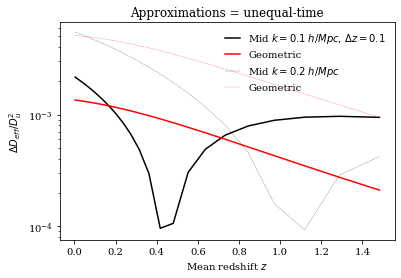

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(zv[:-5], dD1[:-5], 'k', label='Mid $k=0.1\; h/Mpc$, $\Delta z = 0.1$')
plt.plot(zv[:-5], dDg1[:-5], 'r', label='Geometric')


plt.plot(zv[:-5], dD2[:-5], '--k', label='Mid $k=0.2\; h/Mpc$', lw=0.25)
plt.plot(zv[:-5], dDg2[:-5], '--r', label='Geometric', lw=0.25)


plt.ylabel('$\Delta D_{eff}/ D_{u}^2$')
plt.xlabel('Mean redshift $z$')

plt.yscale('log')

plt.title("Approximations = unequal-time")
plt.legend(frameon=False)
# plt.savefig('plots/approx.pdf')

plt.show()

## 3. Differences between Midpoint and Geometric

#### 3.2. Geometric - Midpoint, toy model

* Power spectrum 

$$|P_{geom} - P_{mid}| \approx (\Delta z D`(z_m))^2$$

In [18]:
from scipy.misc import derivative

In [19]:
def deff(z, k=0.1):
    return Det_eff(k, z)
def deffu(z, deltaz=0.1, k=0.1):
    return Duet_eff(k, z-deltaz, z+deltaz)

In [20]:
Dp = derivative(deff, zv)
Dpu = derivative(deffu, zv)

/Users/c49734lf/miniconda3/lib/python3.7/site-packages/skypy/power_spectrum/_growth.py:112: RuntimeWarning: invalid value encountered in power
  growth_factor = np.power(omega_m_z, gamma)
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/skypy/power_spectrum/_growth.py:167: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(integrand, z, z_upper)[0]


In [22]:
def DeltaP(Deltaz, dp):
    return np.square(Deltaz * dp)

In [23]:
def deffk(z):
    return deff(k, z)

In [24]:
Dp05 = derivative(deffk, 0.5)
Dpu05 = derivative(deffu, 0.5)

In [27]:
ddp = error(DeltaP(0.1, Dp), DeltaP(0.1, Dpu), DeltaP(0.1, Dpu))
pg = np.sqrt( Petc(0.1, Dz(zv -0.1), powerk) * Petc(0.1, Dz(zv + 0.1), powerk) )
pm = Petc(0.1, Dz(zv), powerk)
pg_pm = np.absolute(pg - pm)

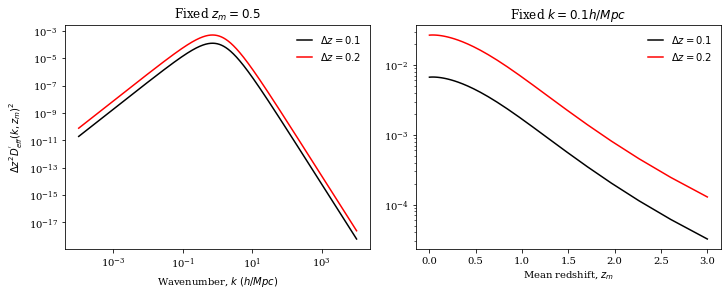

In [28]:
fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True, figsize=(10,4))


ax0.loglog(k, DeltaP(0.1, Dp05), 'k', label='$\Delta z = 0.1$')
ax0.loglog(k, DeltaP(0.2, Dp05), 'r', label='$\Delta z = 0.2$')

ax0.set_xlabel('Wavenumber, $k \; (h/Mpc)$')
ax0.set_ylabel('$\Delta z ^2 D_{eff}^{\'}(k, z_m)^2$')
ax0.set_title("Fixed $z_m=0.5$")
ax0.legend(frameon=False)      
    
ax1.plot(zv, DeltaP(0.1, Dp), 'k', label='$\Delta z = 0.1$') 
ax1.plot(zv, DeltaP(0.2, Dp), 'r', label='$\Delta z = 0.2$')
ax1.set_yscale('log')

ax1.set_xlabel('Mean redshift, $z_m$')
ax1.set_title("Fixed $k = 0.1 h/Mpc$")
ax1.legend(frameon=False)

# plt.savefig('plots/deltap.pdf')

plt.show()

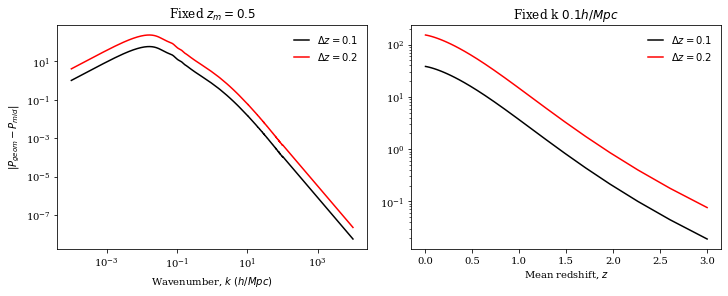

In [29]:
fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True, figsize=(10,4))


ax0.loglog(k, DeltaP(0.1, Dp[37]) * Petc(k, Dz(zv[37]), powerk), 'k', label='$\Delta z = 0.1$')
ax0.loglog(k, DeltaP(0.2, Dp[37]) * Petc(k, Dz(zv[37]), powerk), 'r', label='$\Delta z = 0.2$')

ax0.set_xlabel('Wavenumber, $k$ $(h/Mpc)$')
ax0.set_ylabel('$|P_{geom} - P_{mid}| $')
ax0.set_title("Fixed $z_m=0.5$")
ax0.legend(frameon=False)      
    
ax1.plot(zv, DeltaP(0.1, Dp) * pm, 'k', label='$\Delta z = 0.1$') 
ax1.plot(zv, DeltaP(0.2, Dp) * pm, 'r', label='$\Delta z = 0.2$')
ax1.set_yscale('log')

ax1.set_xlabel('Mean redshift, $z$')
ax1.set_title("Fixed k $0.1 h/Mpc$")
ax1.legend(frameon=False)

# plt.savefig('plots/deltap.pdf')

plt.show()

 * Delta Cl's
 
 Using a toy model where
 \begin{equation}
    n(z) = \delta _D (z - z_a) + \delta _D (z - z_b)
\end{equation}

In [30]:
import scipy.stats as ss

def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

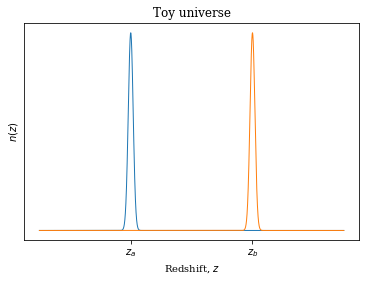

In [32]:
x = np.linspace(-5, 5, 5000)
plot_normal(x, -2, 0.08, lw=1)
plot_normal(x, 2, 0.08, lw=1)

plt.xlabel('Redshift, $z$')
plt.ylabel('$n(z)$')
plt.title('Toy universe')

plt.xticks((-2, 2), ('$z_a$', '$z_b$'))
plt.yticks([])

# plt.savefig('plots/toy.pdf')

plt.show()

In [33]:
from scipy.special import spherical_jn
from scipy.integrate import quad, simps

In [34]:
zm = 0.5
dz = 0.1
za = zm - dz
zb = zm + dz

In [35]:
ell = np.linspace(0.2, 2000)

In [36]:
def jl(multipole, wavenumber, redshift):
    return spherical_jn(multipole, wavenumber * redshift)

In [37]:
def DCl_toy(multipole , zmean=0.5, sepz=0.1):
    jla = jl(multipole, k, zmean - sepz)
    jlb = jl(multipole, k, zmean + sepz)
    integrandk = jla * jlb * Petc(k, 1, powerk) / k**2
    
    def d(z):
        return Det_eff(sepz, z)
    dp = derivative(d, zmean)
    return np.square(sepz * dp) * simps(integrandk, k)  

def DCl(multipole , zmean=0.5, sepz=0.1):
    jla = jl(multipole, k, zmean - sepz)
    jlb = jl(multipole, k, zmean + sepz)
    pg = np.sqrt( Petc(k, Dz(zmean -sepz), powerk) * Petc(k, Dz(zmean + sepz), powerk) )
    pm = Petc(k, Dz(zmean), powerk)
    pg_pm = np.absolute(pg - pm)
    integrandk = jla * jlb * pg_pm / k**2
 
    return simps(integrandk, k)

In [38]:
DCLv = []
for i in range(2000):
#     print(DCl(i))
    DCLv.append(DCl_toy(i))

In [ ]:
DCLv2 = []
for i in range(2000):
#     print(DCl(i))
    DCLv2.append(DCl_toy(i, sepz=0.2))

In [ ]:
lll=np.arange(2000)

In [ ]:
plt.plot(lll[5:], DCLv[5:], '--k', label='$\Delta z = 0.1$', lw=0.5)
plt.plot(lll[5:], DCLv2[5:], ':r', label='$\Delta z = 0.2$', lw=0.25)

plt.yscale('log')

plt.xlabel('Multipoles, $\ell$')
plt.ylabel('$|C_{\ell}^{geom} - C_{\ell}^{mid}|$')
plt.xlim(5,1000)

plt.title("Mean redshift, $z_m=0.5$")
plt.legend(frameon=False);
# plt.savefig('plots/deltacl.pdf')

plt.show()